<a href="https://colab.research.google.com/github/Yehhmii/100dayspy4/blob/main/Space_Missions_Analysis_(start).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [4]:
%pip install iso3166

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [2]:
%pip install --upgrade plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 92.2 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.24.1
    Uninstalling plotly-5.24.1:
      Successfully uninstalled plotly-5.24.1


### Import Statements

In [5]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [6]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [7]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`?
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [7]:
df_data.shape

(4324, 9)

In [8]:
df_data.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [9]:
df_data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

In [10]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    4324 non-null   int64 
 1   Unnamed: 0      4324 non-null   int64 
 2   Organisation    4324 non-null   object
 3   Location        4324 non-null   object
 4   Date            4324 non-null   object
 5   Detail          4324 non-null   object
 6   Rocket_Status   4324 non-null   object
 7   Price           964 non-null    object
 8   Mission_Status  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data.

In [18]:
df_data.isna().sum()

,0
Unnamed: 0.1,0
Unnamed: 0,0
Organisation,0
Location,0
Date,0
Detail,0
Rocket_Status,0
Price,3360
Mission_Status,0


In [20]:
clean_df = df_data.dropna()

In [21]:
clean_df.isna().sum()

,0
Unnamed: 0.1,0
Unnamed: 0,0
Organisation,0
Location,0
Date,0
Detail,0
Rocket_Status,0
Price,0
Mission_Status,0


In [23]:
clean_df.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
5,5,5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success


In [19]:
df_data.duplicated().sum()

np.int64(0)

## Descriptive Statistics

# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [35]:
launches_per_company = df_data['Organisation'].value_counts().reset_index()
launches_per_company.columns = ['Organisation', 'Number of Launches']

fig = px.bar(launches_per_company, x='Organisation', y='Number of Launches', title='Number of Space Mission Launches by Organisation')
fig.show()

In [34]:
import plotly.express as px

launches_per_company = df_data['Organisation'].value_counts().reset_index()
launches_per_company.columns = ['Organisation', 'Number of Launches']
fig = px.bar(
    launches_per_company,
    x='Organisation',
    y='Number of Launches',
    title='Launches by Org (log scale)'
)
fig.update_layout(
    xaxis_tickangle=-45,
    yaxis_type='log',         # ← key!
    yaxis=dict(tickformat='.0f')
)
fig.show()


# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned?

In [40]:
status_counts = df_data['Rocket_Status'].value_counts().reset_index()
status_counts.columns = ['Status', 'Count']

fig_bar = px.bar(status_counts, x='Status', y='Count', title='Number of Active vs Retired Rockets', color='Status', text='Count')

fig_bar.update_layout(yaxis_title='Number of Rockets')
fig_bar.show()

In [43]:
# Pie chart (for % share)
fig_pie = px.pie(
    status_counts,
    names='Status',
    values='Count',
    title='Rocket Status Breakdown',
    hole=0.4
)
fig_pie.update_traces(textposition='inside', textinfo='percent+label')
fig_pie.show()

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [46]:
mission_counts = df_data['Mission_Status'].value_counts().reset_index()
mission_counts.columns = ['Status', 'Count']

fig_bar = px.bar(mission_counts, x='Status', y='Count', title='Mission Status Breakdown', color='Status', text='Count')

fig_bar.update_layout(yaxis_title='Number of Missions')
fig_bar.show()

In [25]:
df_sf = df_data[df_data['Mission_Status'].isin(['Success', 'Failure'])]

missison_counts = df_sf['Mission_Status'].value_counts().reset_index()
missison_counts.columns = ['Mission_Status', 'count']

fig_pie = px.pie(
    missison_counts,
    names='Mission_Status',
    values='count',
    title='Mission Status Breakdown',
    hole=0.4,
    color='Mission_Status',
    color_discrete_map={'success':'#00cc96','failure':'#ff0000'}
)
fig_pie.update_traces(textinfo='percent+label')
fig_pie.show()

# How Expensive are the Launches?

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values).

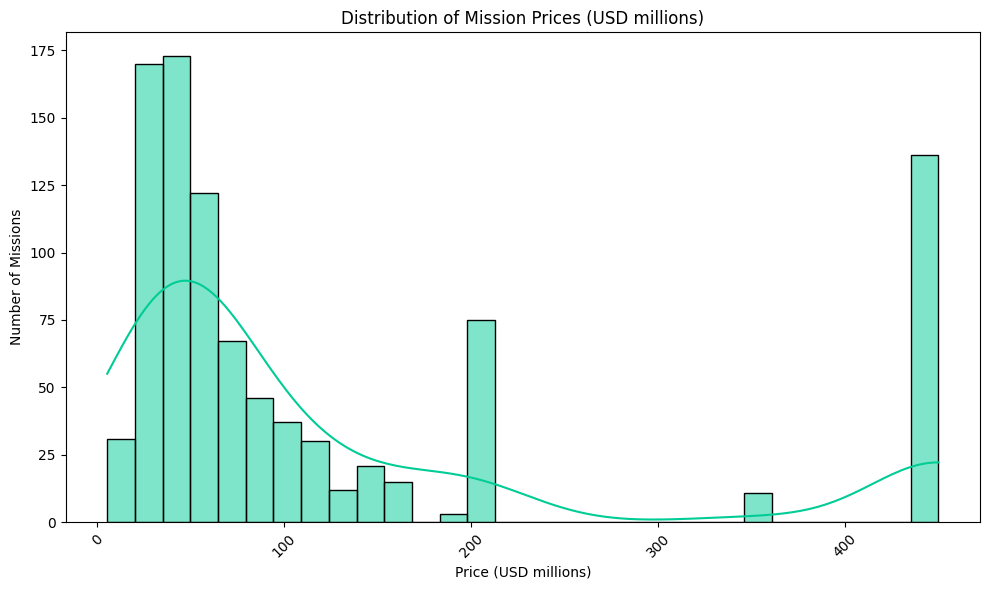

In [26]:
# Convert to numeric & drop NaNs
df_data['Price'] = pd.to_numeric(df_data['Price'], errors='coerce')
prices = df_data['Price'].dropna()


plt.figure(figsize=(10, 6))
sns.histplot(prices, bins=30, kde=True, color='#00cc96')
plt.title('Distribution of Mission Prices (USD millions)')
plt.xlabel('Price (USD millions)')
plt.ylabel('Number of Missions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [27]:
df_data['Price'] = pd.to_numeric(df_data['Price'], errors='coerce')
prices = df_data['Price'].dropna().to_frame(name='Price')

#  Histogram
fig = px.histogram(
    prices,
    x='Price',
    nbins=30,
    title='Distribution of Mission Prices (USD millions)',
    labels={'Price':'Price (USD millions)'},
    color_discrete_sequence=['#636efa'],
)


fig.update_layout(
    bargap=0.1,
    xaxis_tickangle=-45
)
fig.show()

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map.
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [53]:
df = df_data.copy()
# taking everything after the last comma
df['Country'] = df['Location'] \
                  .str.split(',') \
                  .str[-1] \
                  .str.strip()
legacy_map = {
    'Russia':                         'Russian Federation',
    'New Mexico':                     'United States',
    'Yellow Sea':                     'China',
    'Shahrud Missile Test Site':     'Iran',
    'Pacific Missile Range Facility':'United States',
    'Barents Sea':                    'Russian Federation',
    'Gran Canaria':                   'United States'
}

df['Country'] = df['Country'].replace(legacy_map)

In [29]:
# Map to ISO-3 codes
def to_iso3(name):
    try:
        return countries.get(name).alpha3
    except KeyError:
        return None

df['iso_alpha3'] = df['Country'].apply(to_iso3)

df = df.dropna(subset=['iso_alpha3'])
df.head(10)

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,iso_alpha3
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,USA
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,USA
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan,KAZ
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA,USA
5,5,5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success,China,CHN
6,6,6,Roscosmos,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Thu Jul 23, 2020 14:26 UTC",Soyuz 2.1a | Progress MS-15,StatusActive,48.50,Success,Kazakhstan,KAZ
7,7,7,CASC,"LC-101, Wenchang Satellite Launch Center, China","Thu Jul 23, 2020 04:41 UTC",Long March 5 | Tianwen-1,StatusActive,NaN,Success,China,CHN
8,8,8,SpaceX,"SLC-40, Cape Canaveral AFS, Florida, USA","Mon Jul 20, 2020 21:30 UTC",Falcon 9 Block 5 | ANASIS-II,StatusActive,50.00,Success,USA,USA
9,9,9,JAXA,"LA-Y1, Tanegashima Space Center, Japan","Sun Jul 19, 2020 21:58 UTC",H-IIA 202 | Hope Mars Mission,StatusActive,90.00,Success,Japan,JPN


In [12]:
# group nd Count launches per iso and country
launch_counts = (
    df
    .groupby(['iso_alpha3','Country'])
    .size()
    .reset_index(name='launch_count')
)


# Plot the choropleth
fig = px.choropleth(
    launch_counts,
    locations='iso_alpha3',
    color='launch_count',
    hover_name='Country',
    color_continuous_scale=px.colors.sequential.matter,
    title='Number of Space Mission Launches by Country',
    labels={'launch_count':'# of Launches'}
)
fig.update_layout(
    geo=dict(showframe=False, showcoastlines=True),
    margin=dict(l=0, r=0, t=50, b=0)
)
fig.show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [30]:
# ─── getting only failures ─────────────────────────────────────────────────
df_fail = df[df['Mission_Status'].str.lower() == 'failure']

# ─── Map country name → ISO-3166 Alpha-3 ────────────────────────────────
def to_iso3(name):
    try:
        return countries.get(name).alpha3
    except KeyError:
        return None

df_fail['iso_alpha3'] = df_fail['Country'].apply(to_iso3)
df_fail = df_fail.dropna(subset=['iso_alpha3'])


<ipython-input-30-8d1f30cabb32>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [31]:
failure_counts = (
    df_fail
      .groupby(['iso_alpha3','Country'])
      .size()
      .reset_index(name='failure_count')
)

fig = px.choropleth(
    failure_counts,
    locations='iso_alpha3',
    color='failure_count',
    hover_name='Country',
    color_continuous_scale=px.colors.sequential.matter,
    title='Number of Mission Failures by Country',
    labels={'failure_count':'# of Failures'}
)
fig.update_layout(
    geo=dict(showframe=False, showcoastlines=True),
    margin=dict(l=0, r=0, t=50, b=0)
)

fig.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status.

In [32]:
# Aggregate counts at the 3-level hierarchy
sunburst_df = (
    df
    .groupby(['Country', 'Organisation', 'Mission_Status'])
    .size()
    .reset_index(name='launch_count')
)

# Build the Sunburst
fig = px.sunburst(
    sunburst_df,
    path=['Country', 'Organisation', 'Mission_Status'],
    values='launch_count',
    color='Mission_Status',
    color_discrete_map={'success': 'green', 'failure': 'red'},
    title='Space Mission Launches: Country → Organisation → Status'
)

fig.update_layout(margin=dict(l=0, r=0, t=40, b=0))
fig.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [33]:
#  Total Money Spent by Organisation on a Mission ===
spend = df.groupby('Organisation')['Price'].sum().reset_index()
spend.columns = ['Organisation','Total_Spent']
fig = px.bar(spend, x='Organisation', y='Total_Spent',
             title='Total Money Spent by Organisation',
             labels={'Total_Spent':'USD Millions'})
fig.update_layout(xaxis_tickangle=-45)
fig.show()

# Analyse the Amount of Money Spent by Organisation per Launch

In [52]:
# === Money Spent per Launch by Organisation ===
per_launch = df.groupby('Organisation').agg(
    Total_Spent=('Price','sum'),
    Launches=('Price','count')
).reset_index()
per_launch['Avg_per_Launch'] = per_launch['Total_Spent'] / per_launch['Launches']

fig = px.bar(per_launch, x='Organisation', y='Avg_per_Launch',
             title='Average Spend per Launch by Org',
             labels={'Avg_per_Launch':'USD Millions'})
fig.update_layout(xaxis_tickangle=-45)
fig.show()

# Chart the Number of Launches per Year

In [54]:
df['Date'] = pd.to_datetime(
    df['Date'],
    errors='coerce',                # turn unparsable rows into NaT
    utc=True,                       # unify everything to UTC
)

# Check how many failed to parse:
print("Unparsed dates:", df['Date'].isna().sum())

Unparsed dates: 126


In [55]:
df = df.dropna(subset=['Date'])

In [59]:
#  Number of Launches per Year ===
df['Year'] = df['Date'].dt.year
launches_per_year = df.groupby('Year').size().reset_index(name='Launches')
fig = px.line(launches_per_year, x='Year', y='Launches',
              title='Launches per Year')
fig.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart.

In [56]:
# Launches Month-on-Month + rolling avg ===
df.set_index('Date', inplace=True)
monthly = df['Organisation'].resample('M').count().rename('Launches')
# rolling 6-month avg
roll = monthly.rolling(6, min_periods=1).mean()
fig = px.line(x=monthly.index, y=monthly,
              labels={'x':'Date','y':'Launches'},
              title='Monthly Launches + 6-Month Rolling Avg')
fig.add_scatter(x=roll.index, y=roll, mode='lines',
                name='6-Mo Avg')
# find max month
max_month = monthly.idxmax()
print("Highest-launch month:", max_month.date(), "with", monthly.max())
fig.show()

Highest-launch month: 1968-04-30 with 16


<ipython-input-56-238bf2cf7fc4>:3: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [57]:
# Launches by Calendar Month ===
df.reset_index(inplace=True)
df['Month'] = df['Date'].dt.month_name().str.slice(stop=3)
counts_month = df['Month'].value_counts().reindex(
    ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
).fillna(0)
fig = px.bar(x=counts_month.index, y=counts_month.values,
             labels={'x':'Month','y':'Launches'},
             title='Launches by Month (All Years)')
fig.show()
print("Most popular:", counts_month.idxmax(), counts_month.max())
print("Least popular:", counts_month.idxmin(), counts_month.min())

Most popular: Dec 430
Least popular: Jan 265


# How has the Launch Price varied Over Time?

Create a line chart that shows the average price of rocket launches over time.

In [60]:
# Avg Launch Price Over Time ===
year_price = df.groupby('Year')['Price'].mean().reset_index()
fig = px.line(year_price, x='Year', y='Price',
              title='Average Launch Price Over Time',
              labels={'Price':'USD Millions'})
fig.show()

# Chart the Number of Launches over Time by the Top 10 Organisations.

How has the dominance of launches changed over time between the different players?

In [63]:
# Launches Over Time by Top 10 Orgs ===
top10 = df['Organisation'].value_counts().nlargest(10).index
df_top10 = df[df['Organisation'].isin(top10)]
tp = df_top10.groupby(['Year','Organisation']).size().reset_index(name='Launches')
fig = px.line(tp, x='Year', y='Launches', color='Organisation',
              title='Yearly Launches: Top 10 Organisations')
fig.show()

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991.

In [64]:
# Cold-War Race (USA vs USSR to 1991) ===
cw = df[df['Year'] <= 1991]
# we assume df['Country'] exists and has ISO-like names
cw['Country_clean'] = cw['Country'].replace({
    'United States':'USA','Russian Federation':'USSR'
})
cw2 = cw[cw['Country_clean'].isin(['USA','USSR'])]
cw_launches = cw2.groupby(['Year','Country_clean']).size().reset_index(name='Launches')
fig = px.line(cw_launches, x='Year', y='Launches', color='Country_clean',
              title='Cold-War Launches: USA vs USSR (≤1991)')
fig.show()

<ipython-input-64-54216d2a8533>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [69]:
df['Country'].head(20)

,Country
0,USA
1,China
2,USA
3,Kazakhstan
4,USA
5,China
6,Kazakhstan
7,China
8,USA
9,Japan


## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches.

In [70]:
# Pie: total launches USA vs USSR ===
# include ex-Soviet states as USSR
ussr_list = ['Russian Federation','Kazakhstan']

pie_df = df[df['Country'].isin(['USA']+ussr_list)]

pie_df['Block'] = pie_df['Country'].apply(lambda x:'USSR' if x in ussr_list else 'USA')

counts = pie_df['Block'].value_counts().reset_index()
counts.columns=['Superpower','Count']

fig = px.pie(counts, names='Superpower', values='Count',
             title='Total Launches: USA vs USSR')
fig.show()

<ipython-input-70-e40222fff9e8>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [74]:
# YoY launches by USA & USSR ===
yoy = df[df['Country'].isin(['USA']+ussr_list)]
yoy['Block'] = yoy['Country'].apply(lambda x:'USSR' if x in ussr_list else 'USA')
yoy2 = yoy.groupby(['Year','Block']).size().reset_index(name='Launches')
fig = px.bar(yoy2, x='Year', y='Launches', color='Block',
             barmode='group', title='YoY Launches: USA vs USSR')
fig.show()

<ipython-input-74-39069c8a0b50>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Chart the Total Number of Mission Failures Year on Year.

In [73]:
# Yearly Mission Failures ===
fail_yoy = df[df['Mission_Status']=='Failure'].groupby('Year').size().reset_index(name='Failures')
fig = px.line(fail_yoy, x='Year', y='Failures',
              title='Mission Failures Year-on-Year')
fig.show()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time?

In [75]:
# % Failures Over Time ===
yearly = df.groupby('Year').size().reset_index(name='Total')
fails = df[df['Mission_Status']=='Failure'].groupby('Year').size().reset_index(name='Failures')
acc = pd.merge(yearly, fails, on='Year')
acc['Pct_Failure'] = acc['Failures'] / acc['Total'] * 100
fig = px.line(acc, x='Year', y='Pct_Failure',
              title='% Mission Failures Over Time',
              labels={'Pct_Failure':'% Failures'})
fig.show()

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches?

In [76]:
# Leading Country per Year (Cumulative) ===
# Cumulative launches
cum = df.groupby(['Year','Country']).size().groupby(level=1).cumsum().reset_index(name='CumCount')
# find leader each year
leaders = cum.loc[cum.groupby('Year')['CumCount'].idxmax()]
# plot
fig = px.bar(leaders, x='Year', y='CumCount', color='Country',
             title='Cumulative Launch Leader by Country')
fig.show()

# Repeat using only successes
df_suc = df[df['Mission_Status']=='Success']
cum2 = df_suc.groupby(['Year','Country']).size().groupby(level=1).cumsum().reset_index(name='CumCount')
leaders2 = cum2.loc[cum2.groupby('Year')['CumCount'].idxmax()]
fig = px.bar(leaders2, x='Year', y='CumCount', color='Country',
             title='Cumulative SUCCESS Leader by Country')
fig.show()

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020?

In [78]:
# Top Launch Org per Year ===
year_org = df.groupby(['Year','Organisation']).size().reset_index(name='Count')
# pick top org each year
top_org = year_org.loc[year_org.groupby('Year')['Count'].idxmax()]
fig = px.bar(top_org, x='Year', y='Count', color='Organisation',
             title='Top Launch Organisation per Year')
fig.show()

# Which in 1970s/80s vs 2018-20?
print(top_org[(top_org['Year'].between(1970,1989))])
print(top_org[top_org['Year'].isin([2018,2019,2020])])

     Year Organisation  Count
74   1970    RVSN USSR     86
87   1971    RVSN USSR     90
95   1972    RVSN USSR     76
102  1973    RVSN USSR     81
109  1974    RVSN USSR     82
119  1975    RVSN USSR     88
126  1976    RVSN USSR     93
133  1977    RVSN USSR     92
140  1978    RVSN USSR     68
147  1979    RVSN USSR     33
155  1980    RVSN USSR     38
164  1981    RVSN USSR     46
172  1982    RVSN USSR     53
182  1983    RVSN USSR     44
192  1984    RVSN USSR     40
200  1985    RVSN USSR     49
207  1986    RVSN USSR     48
215  1987    RVSN USSR     40
225  1988    RVSN USSR     34
235  1989    RVSN USSR     24
     Year Organisation  Count
585  2018         CASC     37
601  2019         CASC     27
618  2020         CASC     19
